In [84]:
import pandas as pd
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


In [85]:
df1=pd.read_excel("worksheet_combined.xlsx")
df1['is_timed']=0
df1.dropna(subset=['question_type'],inplace=True)
df1

,question_type,question_number,correct_answer,Student_ID,Response,Date_Completed,is_right,difficulty_index,Birthday,Age_years,Age_months,new_id,genre,title,percentage_correct,total_correct,Date_Completed_year,is_timed
0,M,1,A,15,A,2022-03-14,1,1.00,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0
1,M,2,B,15,B,2022-03-14,1,0.89,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0
2,"M, T/F",3,C,15,C,2022-03-14,1,0.89,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0
3,M,4,A,15,A,2022-03-14,1,1.00,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0
4,M,5,B,15,B,2022-03-14,1,0.78,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,G,13,B,24,B,2022-05-05,1,0.50,2012-10-29,9,6,24|2022-05-05,poem,when you are old,0.352941,6/17,2022,0
6435,P,14,A,24,D,2022-05-05,0,0.00,2012-10-29,9,6,24|2022-05-05,poem,when you are old,0.352941,6/17,2022,0
6436,V,15,C,24,D,2022-05-05,0,0.00,2012-10-29,9,6,24|2022-05-05,poem,when you are old,0.352941,6/17,2022,0
6437,M,16,A,24,B,2022-05-05,0,0.00,2012-10-29,9,6,24|2022-05-05,poem,when you are old,0.352941,6/17,2022,0


In [86]:
# since T/F already requires techniques like factual recall or inference to answer,the code below simplifies the question type labeling
df1.question_type.replace({'M, T/F':'M','H, T/F':'H'},inplace=True)

In [87]:
df1.question_type.unique()

array(['M', 'V', 'H', 'G', 'P'], dtype=object)

In [88]:
df1.isna().sum()

question_type           0
question_number         0
correct_answer          0
Student_ID              0
Response               43
Date_Completed          0
is_right                0
difficulty_index        0
Birthday                0
Age_years               0
Age_months              0
new_id                  0
genre                   0
title                   0
percentage_correct      0
total_correct           0
Date_Completed_year     0
is_timed                0
dtype: int64

In [89]:
df2=pd.read_excel("Mock exam data combined.xlsx")
df2['is_timed']=1
df2

,question_type,question_number,correct_answer,Student_ID,Response,Date_Completed,is_right,difficulty_index,Birthday,Age_years,Age_months,new_id,genre,title,percentage_correct,total_correct,Date_Completed_year,is_timed
0,H,1,D,61,C,2020-08-30,0,0.31,2010-05-05,10,4,61|2020-08-30,poem,bluebird,0.7200,18/25,2020,1
1,M,2,D,61,D,2020-08-30,1,0.56,2010-05-05,10,4,61|2020-08-30,poem,bluebird,0.7200,18/25,2020,1
2,G,3,B,61,B,2020-08-30,1,0.78,2010-05-05,10,4,61|2020-08-30,poem,bluebird,0.7200,18/25,2020,1
3,M,4,D,61,C,2020-08-30,0,0.19,2010-05-05,10,4,61|2020-08-30,poem,bluebird,0.7200,18/25,2020,1
4,M,5,B,61,B,2020-08-30,1,0.72,2010-05-05,10,4,61|2020-08-30,poem,bluebird,0.7200,18/25,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,H,13,A,33,A,2020-08-07,1,0.39,2010-03-10,10,5,33|2020-08-07,poem,those winter,0.7059,12/17,2020,1
4338,V,14,C,33,C,2020-08-07,1,0.17,2010-03-10,10,5,33|2020-08-07,poem,those winter,0.7059,12/17,2020,1
4339,H,15,D,33,D,2020-08-07,1,0.39,2010-03-10,10,5,33|2020-08-07,poem,those winter,0.7059,12/17,2020,1
4340,H,16,A,33,A,2020-08-07,1,0.44,2010-03-10,10,5,33|2020-08-07,poem,those winter,0.7059,12/17,2020,1


<h4>Students Performance Trend<h4>

<Axes: title={'center': 'Performance Trend (MOCK EXAMS)'}, xlabel='question_type', ylabel='% correct responses'>

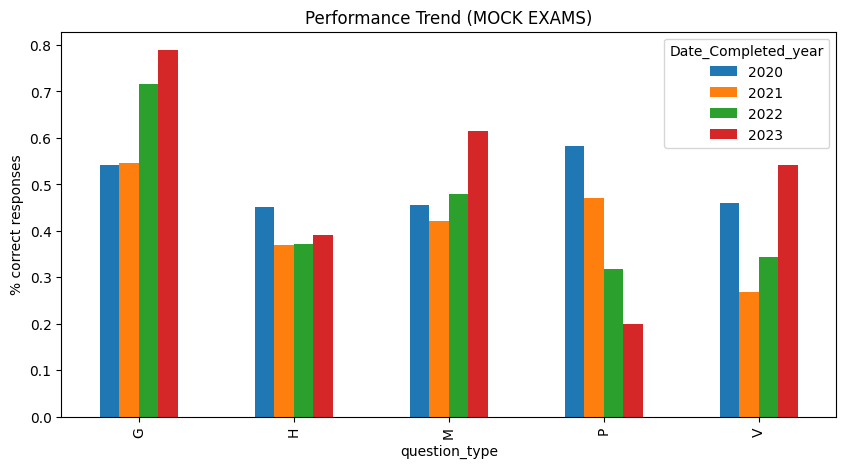

In [90]:
df2.groupby(['question_type','Date_Completed_year'])['is_right'].mean().unstack().plot(kind='bar',figsize=(10,5),
                                                                                      ylabel="% correct responses",title='Performance Trend (MOCK EXAMS)')




The bar chart illustrates a noticeable decline in student performance for questions related to understanding the author's intent (P) and inferring information from the text (H). Conversely, there's a marked improvement in student performance for questions centered around grammar (G) and factual recall (M). 

In [91]:
#  analysing each student's comprehensive ability in terms of factual recall, inference, SPaG (spelling, punctuation and grammar), vocabulary, purpose

# using the percentage of correct responses for each question type in the mock exams.
student_ca2=df2.pivot_table(index='Student_ID',columns='question_type',values='is_right',aggfunc='mean')
student_ca2.reset_index(inplace=True)
student_ca2.rename(columns={'G':'Grammar','M':'Factual_Recall_score','H':'Inference_score','P':'purpose_score','V':'vocabulary_score'},inplace=True)
student_ca2=student_ca2.round(2)
student_ca2.head()



question_type,Student_ID,Grammar,Inference_score,Factual_Recall_score,purpose_score,vocabulary_score
0,1,0.61,0.42,0.56,0.58,0.52
1,2,1.00,0.00,0.29,0.00,0.00
2,6,0.33,0.43,0.54,0.00,0.25
3,7,0.71,0.19,0.33,0.50,0.17
4,11,0.71,0.50,0.49,0.50,0.36


The data above helps to understand the strength and weaknesses of each student, as we can see that the student with id 11, got approximately 71% of the Grammar questions correctly, 50% of the inference questions correctly, 49% of the factuall recall questions correctly , 50% of questions on purpose correctly, and 36% of vocabulary questions correctly. The student's performance suggests that they have relatively strong skills in grammar, but struggle with factual recall, understanding author's intent and vocabulary.

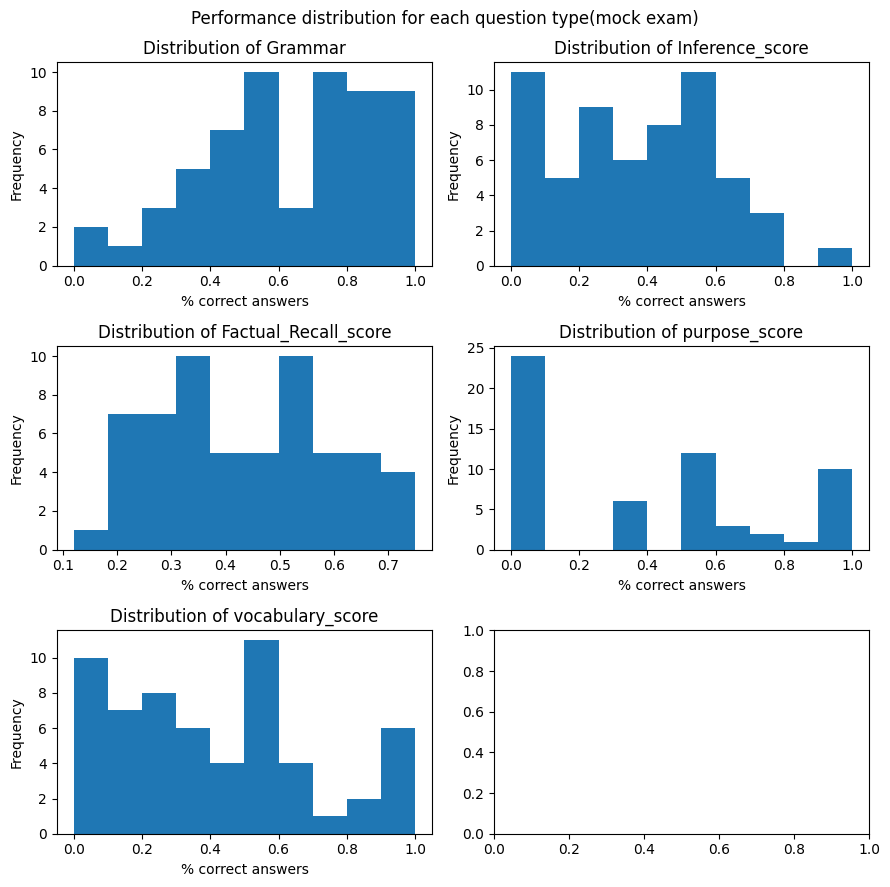

In [92]:
column_names=student_ca2.columns.to_list()[1:]
num_columns=len(column_names)
num_rows = (num_columns + 1) // 2  

fig, axes = plt.subplots(num_rows, 2, figsize=(9, 3 * num_rows))
fig.suptitle('Performance distribution for each question type(mock exam)')

for i, column in enumerate(column_names):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    ax.hist(student_ca2[column], bins=10)  # Adjust 'bins' for desired granularity
    ax.set_xlabel('% correct answers')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {column}')


plt.tight_layout()
plt.show()






In [93]:
student_ca2.isna().sum()

question_type
Student_ID              0
Grammar                 0
Inference_score         0
Factual_Recall_score    0
purpose_score           1
vocabulary_score        0
dtype: int64

a student did not get any question to test their understanding of author's intent 

In [94]:
# estimate what the student would get by using the median performance
student_ca2.purpose_score.fillna(student_ca2.purpose_score.median(),inplace=True)

In [95]:
student_ca2.isna().sum()

question_type
Student_ID              0
Grammar                 0
Inference_score         0
Factual_Recall_score    0
purpose_score           0
vocabulary_score        0
dtype: int64

In [96]:
#  analysing each student's comprehensive ability in terms of factual recall, inference, SPaG (spelling, punctuation and grammar), vocabulary, purpose
# using the percentage of correct responses for each question type in the work sheet data.

student_ca1=df1.pivot_table(index='Student_ID',columns='question_type',values='is_right',aggfunc='mean')
student_ca1.reset_index(inplace=True)
student_ca1.rename(columns={'G':'Grammar','M':'Factual_Recall_score','H':'Inference_score','P':'purpose_score','V':'vocabulary_score'},inplace=True)
student_ca1=student_ca1.round(2)
student_ca1


question_type,Student_ID,Grammar,Inference_score,Factual_Recall_score,purpose_score,vocabulary_score
0,1,1.00,0.00,0.56,NaN,1.00
1,2,0.57,0.62,0.46,0.64,0.61
2,3,0.20,0.33,0.50,0.00,0.67
3,4,0.57,0.17,0.59,0.80,0.67
4,5,0.67,0.33,0.44,0.40,0.75
5,6,1.00,0.50,0.67,NaN,0.50
6,8,0.50,0.56,0.61,0.36,0.56
7,9,1.00,1.00,0.74,1.00,0.80
8,11,1.00,0.33,0.67,NaN,0.50
9,12,0.60,0.52,0.56,0.50,0.52


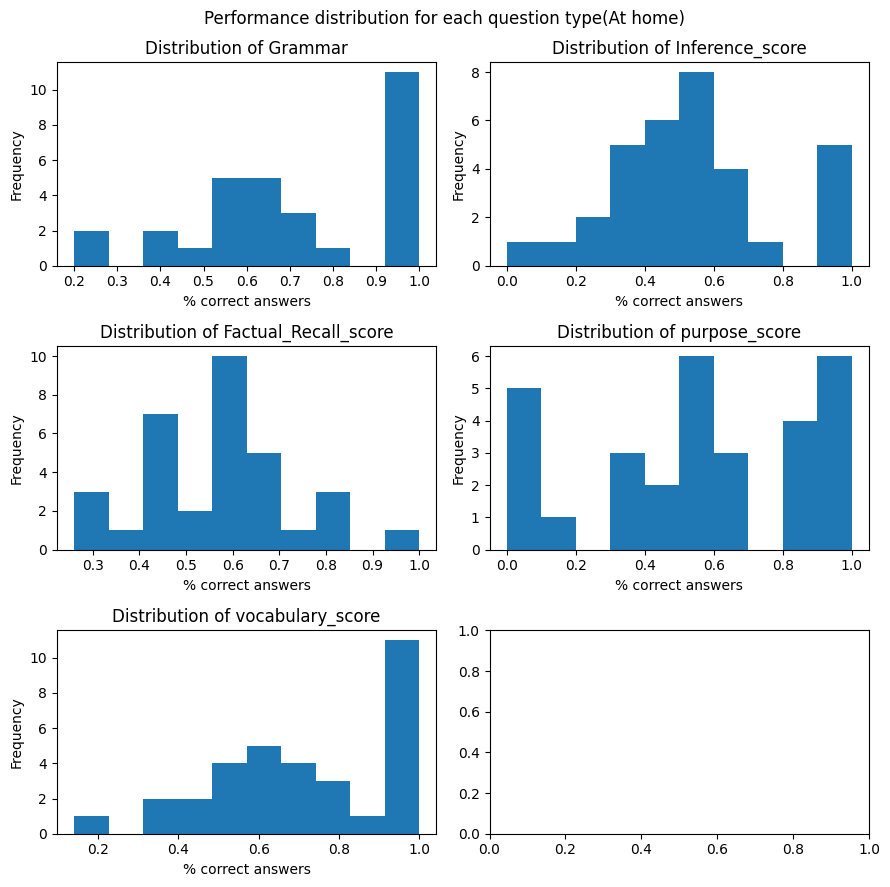

In [97]:
column_names=student_ca1.columns.to_list()[1:]
num_columns=len(column_names)
num_rows = (num_columns + 1) // 2  

fig, axes = plt.subplots(num_rows, 2, figsize=(9, 3 * num_rows))
fig.suptitle('Performance distribution for each question type(At home)')

for i, column in enumerate(column_names):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.hist(student_ca1[column], bins=10)  # Adjust 'bins' for desired granularity
    ax.set_xlabel('% correct answers')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {column}')


plt.tight_layout()
plt.show()






In [98]:
student_ca1.isna().sum()

question_type
Student_ID              0
Grammar                 3
Inference_score         0
Factual_Recall_score    0
purpose_score           3
vocabulary_score        0
dtype: int64

In [99]:
student_ca1['Grammar'].fillna(student_ca1['Grammar'].median(),inplace=True)
student_ca1['purpose_score'].fillna(student_ca1['purpose_score'].median(),inplace=True)

In [100]:
student_ca1.isna().sum()

question_type
Student_ID              0
Grammar                 0
Inference_score         0
Factual_Recall_score    0
purpose_score           0
vocabulary_score        0
dtype: int64

<h4> ATOS (Advantage-TASA Open Standard)<h4>

ATOS is a measure of readability. ATOS takes into account the most important predictors of text  complexity duch as avrrage sentence length, average word length and word difficulty level,
The ATOS level for each comprehension passage was calculated using the free ATOS analyzer tool provided by Renaissance Learning's Accelerated Reader (AR) program, which is one of the primary sources for ATOS level information. ([Tool link](https://www.renaissance.com/resources/atos-analyzer/atos-analyzer-tool/#atos_form_section))


In [101]:
atos_level=pd.read_csv("ATOS level.csv")
atos_level

,title,ATOS level
0,bluebird,6.44
1,dorian,3.80
2,the hobbit,6.17
3,jane eyre,7.09
4,metamorphosis,6.55
...,...,...
62,voyage,9.63
63,war of the worlds,8.64
64,when you are old,8.00
65,wind in the willows,8.35


In [102]:
mock=pd.merge(df2,student_ca2,on='Student_ID',how='inner')
mock

,question_type,question_number,correct_answer,Student_ID,Response,Date_Completed,is_right,difficulty_index,Birthday,Age_years,...,title,percentage_correct,total_correct,Date_Completed_year,is_timed,Grammar,Inference_score,Factual_Recall_score,purpose_score,vocabulary_score
0,H,1,D,61,C,2020-08-30,0,0.31,2010-05-05,10,...,bluebird,0.7200,18/25,2020,1,0.45,0.46,0.51,0.67,0.22
1,M,2,D,61,D,2020-08-30,1,0.56,2010-05-05,10,...,bluebird,0.7200,18/25,2020,1,0.45,0.46,0.51,0.67,0.22
2,G,3,B,61,B,2020-08-30,1,0.78,2010-05-05,10,...,bluebird,0.7200,18/25,2020,1,0.45,0.46,0.51,0.67,0.22
3,M,4,D,61,C,2020-08-30,0,0.19,2010-05-05,10,...,bluebird,0.7200,18/25,2020,1,0.45,0.46,0.51,0.67,0.22
4,M,5,B,61,B,2020-08-30,1,0.72,2010-05-05,10,...,bluebird,0.7200,18/25,2020,1,0.45,0.46,0.51,0.67,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,M,14,D,47,D,2023-05-31,1,0.29,2013-01-01,10,...,the hobbit,0.7222,13/18,2023,1,1.00,0.50,0.75,0.00,1.00
4338,H,15,D,47,B,2023-05-31,0,0.00,2013-01-01,10,...,the hobbit,0.7222,13/18,2023,1,1.00,0.50,0.75,0.00,1.00
4339,M,16,B,47,B,2023-05-31,1,0.86,2013-01-01,10,...,the hobbit,0.7222,13/18,2023,1,1.00,0.50,0.75,0.00,1.00
4340,M,17,D,47,D,2023-05-31,1,0.71,2013-01-01,10,...,the hobbit,0.7222,13/18,2023,1,1.00,0.50,0.75,0.00,1.00


In [103]:
wsheet=pd.merge(df1,student_ca1,on='Student_ID',how='inner')

In [104]:
wsheet

,question_type,question_number,correct_answer,Student_ID,Response,Date_Completed,is_right,difficulty_index,Birthday,Age_years,...,title,percentage_correct,total_correct,Date_Completed_year,is_timed,Grammar,Inference_score,Factual_Recall_score,purpose_score,vocabulary_score
0,M,1,A,15,A,2022-03-14,1,1.00,2012-08-26,9,...,1984_passage,0.615385,8/13,2022,0,1.0,0.45,0.61,0.5,0.64
1,M,2,B,15,B,2022-03-14,1,0.89,2012-08-26,9,...,1984_passage,0.615385,8/13,2022,0,1.0,0.45,0.61,0.5,0.64
2,M,3,C,15,C,2022-03-14,1,0.89,2012-08-26,9,...,1984_passage,0.615385,8/13,2022,0,1.0,0.45,0.61,0.5,0.64
3,M,4,A,15,A,2022-03-14,1,1.00,2012-08-26,9,...,1984_passage,0.615385,8/13,2022,0,1.0,0.45,0.61,0.5,0.64
4,M,5,B,15,B,2022-03-14,1,0.78,2012-08-26,9,...,1984_passage,0.615385,8/13,2022,0,1.0,0.45,0.61,0.5,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,H,13,A,16,D,2021-06-12,0,0.70,2010-12-31,10,...,those winter,0.529412,9/17,2021,0,1.0,0.44,0.60,0.0,1.00
2039,V,14,C,16,C,2021-06-12,1,0.50,2010-12-31,10,...,those winter,0.529412,9/17,2021,0,1.0,0.44,0.60,0.0,1.00
2040,H,15,D,16,C,2021-06-12,0,0.40,2010-12-31,10,...,those winter,0.529412,9/17,2021,0,1.0,0.44,0.60,0.0,1.00
2041,H,16,A,16,A,2021-06-12,1,0.40,2010-12-31,10,...,those winter,0.529412,9/17,2021,0,1.0,0.44,0.60,0.0,1.00


In [105]:
# code to combine the mock exam and work sheet data
data=pd.concat([mock,wsheet])

In [106]:
data['genre'].replace({'NON-fiction':'non-fiction','fiction book but passage seems non-fiction':'non-fiction'},inplace=True)
data.genre.unique()

array(['poem', 'fiction', 'non-fiction'], dtype=object)

In [107]:
data.shape

(6385, 23)

In [108]:
# merge with the atos level data
df=pd.merge(data,atos_level,on='title')

In [109]:
df

,question_type,question_number,correct_answer,Student_ID,Response,Date_Completed,is_right,difficulty_index,Birthday,Age_years,...,percentage_correct,total_correct,Date_Completed_year,is_timed,Grammar,Inference_score,Factual_Recall_score,purpose_score,vocabulary_score,ATOS level
0,H,1,D,61,C,2020-08-30,0,0.31,2010-05-05,10,...,0.72,18/25,2020,1,0.45,0.46,0.51,0.67,0.22,6.44
1,M,2,D,61,D,2020-08-30,1,0.56,2010-05-05,10,...,0.72,18/25,2020,1,0.45,0.46,0.51,0.67,0.22,6.44
2,G,3,B,61,B,2020-08-30,1,0.78,2010-05-05,10,...,0.72,18/25,2020,1,0.45,0.46,0.51,0.67,0.22,6.44
3,M,4,D,61,C,2020-08-30,0,0.19,2010-05-05,10,...,0.72,18/25,2020,1,0.45,0.46,0.51,0.67,0.22,6.44
4,M,5,B,61,B,2020-08-30,1,0.72,2010-05-05,10,...,0.72,18/25,2020,1,0.45,0.46,0.51,0.67,0.22,6.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6380,M,6,D,29,D,2021-09-27,1,1.00,2013-08-27,8,...,0.70,7/10,2021,0,1.00,0.50,0.78,0.33,1.00,7.89
6381,H,7,C,29,C,2021-09-27,1,0.50,2013-08-27,8,...,0.70,7/10,2021,0,1.00,0.50,0.78,0.33,1.00,7.89
6382,H,8,A,29,B,2021-09-27,0,0.75,2013-08-27,8,...,0.70,7/10,2021,0,1.00,0.50,0.78,0.33,1.00,7.89
6383,H,9,A,29,C,2021-09-27,0,0.75,2013-08-27,8,...,0.70,7/10,2021,0,1.00,0.50,0.78,0.33,1.00,7.89


In [110]:
df.is_right.value_counts()

is_right
0    3284
1    3101
Name: count, dtype: int64

<h3> Feature engineering

In [111]:
new_df=pd.get_dummies(df,columns=['genre','question_type','Date_Completed_year'],dtype=int)
new_df

,question_number,correct_answer,Student_ID,Response,Date_Completed,is_right,difficulty_index,Birthday,Age_years,Age_months,...,genre_poem,question_type_G,question_type_H,question_type_M,question_type_P,question_type_V,Date_Completed_year_2020,Date_Completed_year_2021,Date_Completed_year_2022,Date_Completed_year_2023
0,1,D,61,C,2020-08-30,0,0.31,2010-05-05,10,4,...,1,0,1,0,0,0,1,0,0,0
1,2,D,61,D,2020-08-30,1,0.56,2010-05-05,10,4,...,1,0,0,1,0,0,1,0,0,0
2,3,B,61,B,2020-08-30,1,0.78,2010-05-05,10,4,...,1,1,0,0,0,0,1,0,0,0
3,4,D,61,C,2020-08-30,0,0.19,2010-05-05,10,4,...,1,0,0,1,0,0,1,0,0,0
4,5,B,61,B,2020-08-30,1,0.72,2010-05-05,10,4,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6380,6,D,29,D,2021-09-27,1,1.00,2013-08-27,8,1,...,0,0,0,1,0,0,0,1,0,0
6381,7,C,29,C,2021-09-27,1,0.50,2013-08-27,8,1,...,0,0,1,0,0,0,0,1,0,0
6382,8,A,29,B,2021-09-27,0,0.75,2013-08-27,8,1,...,0,0,1,0,0,0,0,1,0,0
6383,9,A,29,C,2021-09-27,0,0.75,2013-08-27,8,1,...,0,0,1,0,0,0,0,1,0,0


In [112]:
new_df.shape

(6385, 33)

In [113]:
# building a model to predict whether a student will answer a question correctly or not
X=new_df.drop(columns=['Response','correct_answer','Date_Completed','Birthday','title','Student_ID','question_number','is_right','new_id','total_correct'])
y=new_df['is_right']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)




In [114]:
X.isna().sum()

difficulty_index            0
Age_years                   0
Age_months                  0
percentage_correct          0
is_timed                    0
Grammar                     0
Inference_score             0
Factual_Recall_score        0
purpose_score               0
vocabulary_score            0
ATOS level                  0
genre_fiction               0
genre_non-fiction           0
genre_poem                  0
question_type_G             0
question_type_H             0
question_type_M             0
question_type_P             0
question_type_V             0
Date_Completed_year_2020    0
Date_Completed_year_2021    0
Date_Completed_year_2022    0
Date_Completed_year_2023    0
dtype: int64

In [115]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5108, 23), (5108,), (1277, 23), (1277,))

In [116]:
# building a pipeline to scale the data and then fit a logistic regression model
logreg=Pipeline([('scaler',StandardScaler()),('logreg',LogisticRegression())])
logreg.fit(X_train,y_train)



Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [117]:
# Create regularization hyperparameter space
param_grid={'logreg__C':[0.001,0.01,0.1,1,10,100,1000]}

grid_lr=GridSearchCV(logreg,param_grid,cv=5,verbose=0)
grid_lr.fit(X_train,y_train)
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'logreg__C': 1}
0.7525443188156349


In [118]:
#Predict Using Best Model
# Predict target vector
y_pred_log = grid_lr.predict(X_test)
y_pred_log

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [119]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_log))
print('-----')
print(classification_report(y_test, y_pred_log))

[[514 146]
 [175 442]]
-----
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       660
           1       0.75      0.72      0.73       617

    accuracy                           0.75      1277
   macro avg       0.75      0.75      0.75      1277
weighted avg       0.75      0.75      0.75      1277



<Axes: title={'center': 'Logisticsregression Confusion Matrix'}>

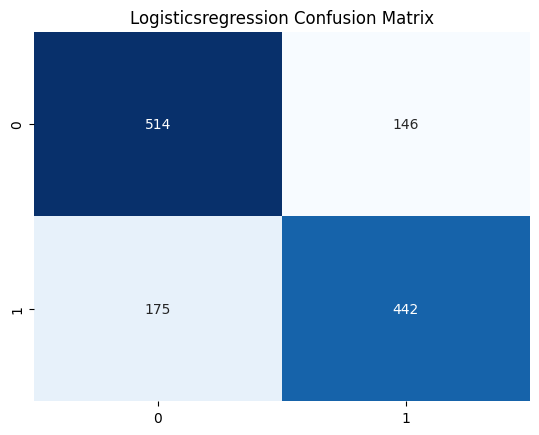

In [120]:
plt.title("Logisticsregression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_log),annot=True,cmap="Blues",fmt="d",cbar=False)